# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, I will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [1]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
crops = pd.read_csv("soil_measures.csv")


In [2]:
# Counting missing values
print(crops.isna().sum().sort_values())

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


There are no missing values... Lucky me! Let's get the info to obtain the type of data

In [3]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


Thus, everything is numeric, except for the target variable. I was expecting this one to be string, however is classified as an object... Let's determine the number of crops

In [4]:
crops['crop'].nunique()

22

In [5]:
crops['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

Now we know that we have 22 diferent types of crops with 100 entries each. Let's make sure that all the values are distinct.

In [6]:
crops = crops.drop_duplicates()
crops.shape

(2200, 5)

The shape is the same so now we know that we didn't have duplicate rows.
Now, let's split the data

In [7]:
X = crops.drop(['crop'],axis=1).values
y = crops['crop'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
def feat_score(feat_train,feat_test,y_train,y_test):
    #This function train and test a Logistic Regression model 
    #and returns the f1 score
    logreg = LogisticRegression(max_iter=2000,multi_class='multinomial')
    logreg.fit(feat_train,y_train)
    y_pred=logreg.predict(feat_test)
    return (logreg,f1_score(y_test,y_pred,average='weighted'),y_pred)

In [9]:
scores = []
for no_feat in range(X.shape[1]):
    feat_train=X_train[:,no_feat].reshape(-1, 1)
    feat_test=X_test[:,no_feat].reshape(-1, 1)
    scores.append(feat_score(feat_train,feat_test,y_train,y_test)[1])
print(scores)

[0.10187518380875378, 0.12816696343647532, 0.2085093790893408, 0.04532731061152114]


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Those are very low scores!!!!! Let's analyze the correlation between variables

In [10]:
print(crops.iloc[:,:4].corr())

           N         P         K        ph
N   1.000000 -0.231460 -0.140512  0.096683
P  -0.231460  1.000000  0.736232 -0.138019
K  -0.140512  0.736232  1.000000 -0.169503
ph  0.096683 -0.138019 -0.169503  1.000000


It looks like there exists an strong correlation between P and K variables. Since the score obtained for the feature K is higher, I will remove P from the analysis.

In [11]:
X_train_final = X_train[:,[0,2,3]]
X_test_final = X_test[:,[0,2,3]]
log_reg,model_performance,y_pred = feat_score(X_train_final,X_test_final,y_train,y_test)
print('Model performance {}'.format(model_performance))

Model performance 0.5784421341470544


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I will create a DataFrame with the outputs because it's easier for me to work

In [12]:
data_to_compare = pd.DataFrame(X_test_final,columns=['N','K','ph'])
data_to_compare['y_test'] = y_test
data_to_compare['y_pred'] = y_pred
data_to_compare.head()

,N,K,ph,y_test,y_pred
0,101.0,47.0,6.185053,muskmelon,muskmelon
1,98.0,51.0,6.259336,watermelon,muskmelon
2,59.0,49.0,6.941497,papaya,papaya
3,44.0,55.0,6.825371,papaya,papaya
4,30.0,200.0,5.603413,apple,apple


In [13]:
test_count = data_to_compare['y_test'].value_counts().sort_index()
pred_count = data_to_compare['y_pred'].value_counts().sort_index()
print(test_count.head())
print(pred_count.head())

apple        23
banana       21
blackgram    20
chickpea     26
coconut      27
Name: y_test, dtype: int64
apple         8
banana       18
blackgram    20
chickpea     26
coconut      27
Name: y_pred, dtype: int64


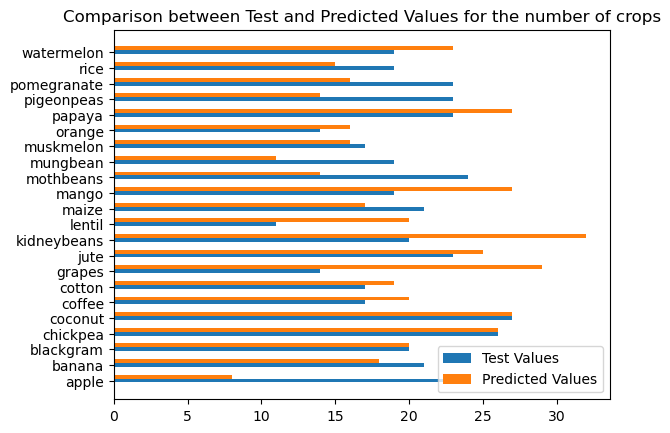

In [14]:
barwidth = .25
crop_names = test_count.index
br1 = np.arange(len(crop_names))
br2 = [x + barwidth for x in br1]
plt.barh(br1,test_count.values,height=barwidth,label='Test Values')
plt.barh(br2,pred_count.values,height=barwidth,label='Predicted Values')
plt.yticks(range(len(crop_names)), crop_names)
plt.legend()
plt.title('Comparison between Test and Predicted Values for the number of crops')
plt.show()

Let's analyze the feature behaviour for the cases when test and predicted values match and when they differ

In [15]:
matches = data_to_compare.query('y_test == y_pred')
differences = data_to_compare.query('y_test != y_pred')
matches.head()

,N,K,ph,y_test,y_pred
0,101.0,47.0,6.185053,muskmelon,muskmelon
2,59.0,49.0,6.941497,papaya,papaya
3,44.0,55.0,6.825371,papaya,papaya
4,30.0,200.0,5.603413,apple,apple
5,18.0,27.0,4.772386,mango,mango


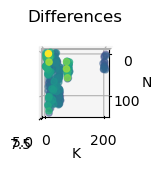

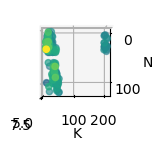

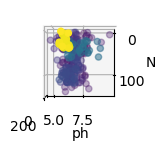

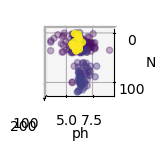

In [17]:
ax = plt.figure().add_subplot(321,projection='3d')
ax.view_init(elev=90, azim=0)
ax.scatter(matches['N'],matches['K'],matches['ph'],c=matches['ph'])
ax.set_xlabel('N')
ax.set_ylabel('K')
ax.set_title('Differences')
ax = plt.figure().add_subplot(322,projection='3d')
ax.view_init(elev=90, azim=0)
ax.scatter(differences['N'],differences['K'],differences['ph'],c=differences['ph'])
ax.set_xlabel('N')
ax.set_ylabel('K')
#
ax = plt.figure().add_subplot(323,projection='3d')
ax.view_init(elev=90, azim=0)
ax.scatter(matches['N'],matches['ph'],matches['K'],c=matches['K'])
ax.set_xlabel('N')
ax.set_ylabel('ph')
ax = plt.figure().add_subplot(324,projection='3d')
ax.view_init(elev=90, azim=0)
ax.scatter(differences['N'],differences['ph'],differences['K'],c=differences['K'])
ax.set_xlabel('N')
ax.set_ylabel('ph')
plt.show()